# Batch Gradient Descent With a Single Neuron

*Tue Feb 9, Week 3, Lecture 5*

## Why Python and why Jupyter Notebooks?

- Python is not an ideal langauge for this
- Jupyter is not an ideal environment for htis
- They are the **best** we have (in my opinion)

## Notes

- In this example, I am not going to do fancy imports
- I want you to see the layout of torch and torchvision

![](2021-02-10-neuron-notes.jpg)

In [2]:
import torch

In [3]:
torch.rand(5)

tensor([0.6559, 0.6745, 0.1857, 0.4859, 0.5376])

In [4]:
torch.rand(5).shape

torch.Size([5])

In [5]:
torch.rand(5, 25)

tensor([[0.1421, 0.5651, 0.9997, 0.4379, 0.4822, 0.3612, 0.1041, 0.8134, 0.3114,
         0.8174, 0.0240, 0.9058, 0.9473, 0.6067, 0.0686, 0.8540, 0.8425, 0.8095,
         0.9894, 0.1818, 0.7425, 0.5337, 0.1459, 0.4457, 0.4607],
        [0.2753, 0.2340, 0.7315, 0.1464, 0.4301, 0.5137, 0.9905, 0.5745, 0.4906,
         0.3992, 0.1298, 0.0612, 0.8402, 0.7759, 0.0689, 0.6112, 0.9761, 0.5120,
         0.8382, 0.7776, 0.4065, 0.6859, 0.0355, 0.2000, 0.6846],
        [0.5492, 0.6795, 0.6323, 0.0183, 0.0458, 0.7647, 0.7858, 0.6501, 0.6114,
         0.9406, 0.9842, 0.4090, 0.9772, 0.8922, 0.2913, 0.8323, 0.8534, 0.7647,
         0.2822, 0.8802, 0.6291, 0.6481, 0.2886, 0.4884, 0.4803],
        [0.4436, 0.2099, 0.2658, 0.2717, 0.8554, 0.1525, 0.2596, 0.5880, 0.2768,
         0.1221, 0.2128, 0.9634, 0.6681, 0.4105, 0.3714, 0.4348, 0.7995, 0.2310,
         0.7824, 0.5649, 0.3516, 0.5729, 0.9857, 0.5342, 0.8657],
        [0.1338, 0.3549, 0.3703, 0.9325, 0.4786, 0.8093, 0.0243, 0.0857, 0.2218,
       

In [6]:
torch.rand(5, 25).shape

torch.Size([5, 25])

In [7]:
X = torch.rand(5, 12)
Y = torch.rand(12, 16)

In [8]:
X.shape, Y.shape

(torch.Size([5, 12]), torch.Size([12, 16]))

In [9]:
X

tensor([[0.6024, 0.2324, 0.5835, 0.5698, 0.3306, 0.7101, 0.2171, 0.9921, 0.7112,
         0.2030, 0.6085, 0.4897],
        [0.8638, 0.2162, 0.0325, 0.5694, 0.8306, 0.1412, 0.9464, 0.0966, 0.4502,
         0.0967, 0.0884, 0.1272],
        [0.6742, 0.5368, 0.5999, 0.9342, 0.4922, 0.9439, 0.4628, 0.6094, 0.7772,
         0.7615, 0.1510, 0.3995],
        [0.1559, 0.8499, 0.3362, 0.1704, 0.7954, 0.7656, 0.9667, 0.4691, 0.3567,
         0.6626, 0.3895, 0.4740],
        [0.5451, 0.1338, 0.7106, 0.6133, 0.9111, 0.8062, 0.8513, 0.5129, 0.5440,
         0.9586, 0.4988, 0.2231]])

In [10]:
X @ Y

tensor([[3.8796, 3.0237, 3.4297, 3.1230, 2.3967, 2.8008, 3.5147, 3.6485, 3.5464,
         2.3520, 3.1618, 2.6088, 3.1983, 3.4108, 3.8496, 3.3973],
        [2.7297, 2.1273, 2.0943, 3.1069, 2.3536, 3.1012, 1.9404, 2.3408, 2.2542,
         1.4507, 2.2486, 1.3098, 2.2580, 2.4077, 2.7242, 2.8654],
        [4.5882, 3.9459, 3.9832, 3.9535, 2.8679, 3.6182, 3.6701, 4.0607, 3.7144,
         2.7316, 3.4833, 3.0029, 4.0037, 3.9815, 4.7554, 4.0302],
        [3.8106, 3.8144, 3.1560, 3.4267, 2.3823, 3.4461, 3.6341, 3.8274, 3.1398,
         2.2623, 3.3850, 2.2100, 3.7477, 3.5399, 3.5410, 3.3300],
        [4.1129, 4.0660, 3.8205, 4.2370, 2.7417, 3.5275, 3.8885, 4.0431, 3.7540,
         2.5892, 3.8432, 2.6094, 4.2013, 4.1917, 4.5790, 3.9672]])

In [11]:
Z = X @ Y

In [12]:
X.shape, Y.shape

(torch.Size([5, 12]), torch.Size([12, 16]))

In [13]:
Z.shape

torch.Size([5, 16])

In [13]:
Y @ Z

RuntimeError: mat1 and mat2 shapes cannot be multiplied (12x16 and 5x16)

In [14]:
import torchvision

In [15]:
# MNIST : hello world
# EMNIST : extended with letters in addition to digits
# KMNIST : Kuzushiji, Japanese characters
# QMNIST : newer MNIST with better source information

data_path = "../data/"

mnist_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_dataset = torchvision.datasets.MNIST(
    root=data_path, train=True, download=True, transform=mnist_transforms
)

In [16]:
# batch_size, shuffle
train_loader = torch.utils.data.DataLoader(train_dataset)

In [17]:
image, label = next(iter(train_loader))

In [18]:
image.shape

torch.Size([1, 1, 28, 28])

In [19]:
label.shape, label

(torch.Size([1]), tensor([5]))

In [20]:
import matplotlib.pyplot as plt

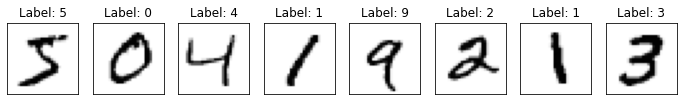

In [21]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [22]:
# Simple single neuron model; sometimes called logistic regression

num_pixels = 28 * 28

# Neuron parameters
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

In [23]:
weights.shape, bias.shape, image[0].shape, image[0].view(num_pixels, 1).shape

(torch.Size([784, 1]),
 torch.Size([1]),
 torch.Size([1, 28, 28]),
 torch.Size([784, 1]))

In [24]:
x = image[0]

In [25]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 1x784)

In [26]:
x = image[0].view(num_pixels, 1)

In [27]:
weights @ x

RuntimeError: mat1 and mat2 shapes cannot be multiplied (784x1 and 784x1)

In [28]:
weights.T @ x

tensor([[0.4382]])

In [29]:
# from torch import FloatTensor, FloatType


def linear(w, b, x):
    return w.T @ x + b

In [30]:
linear(weights, bias, x)

tensor([[0.4382]])

In [31]:
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

In [32]:
sigmoid(linear(weights, bias, x))

tensor([[0.6078]])

In [33]:
# Get down to two classes (let them pick)

class1 = 7
class2 = 1

idx1 = [i for i, t in enumerate(train_dataset.targets) if t == class1]
idx2 = [i for i, t in enumerate(train_dataset.targets) if t == class2]

idxs = idx1 + idx2
train_size = len(idxs)

train_loader2 = torch.utils.data.DataLoader(
    train_dataset, sampler=torch.utils.data.SubsetRandomSampler(idxs)
)

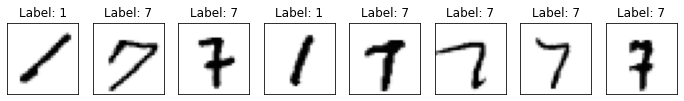

In [34]:
num_to_show = 8

fig, axes = plt.subplots(1, num_to_show, figsize=(12, 12))

for axis, (image, label) in zip(axes, train_loader2):
    axis.imshow(image.squeeze(), cmap="Greys")
    axis.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    axis.set_title(f"Label: {label[0]}")

In [35]:
from time import time

In [36]:
# Optimization, binary cross-entropy loss (Log loss, aka logistic loss or cross-entropy loss)
# defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true

# compare with: subtraction, MSE, abs


def target_to_sigmoid(target):
    new_target = torch.zeros_like(target)
    new_target[target == class1] = 1
    return new_target


# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 10
learning_rate = 0.01

for epoch in range(num_epochs):

    cost = 0
    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    for image, target in train_loader2:

        image = image.view(num_pixels, 1)
        target = target_to_sigmoid(target)

        prediction = sigmoid(linear(weights, bias, image))

        loss = target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction)
        cost -= loss

        dz = prediction - target
        weights_derivatives += image * dz
        bias_derivative += dz.squeeze()

    weights_derivatives /= len(train_loader2)
    bias_derivative /= len(train_loader2)

    weights -= learning_rate * weights_derivatives
    bias -= learning_rate * bias_derivative

    print(
        f"{epoch+1:>2}/{num_epochs}, Cost={cost[0][0]:0.1f}, Time={time()-start:0.1f}s"
    )

 1/10, Cost=10287.2, Time=3.7s
 2/10, Cost=7612.9, Time=3.7s
 3/10, Cost=6000.4, Time=3.6s
 4/10, Cost=4976.7, Time=3.7s
 5/10, Cost=4282.5, Time=3.6s
 6/10, Cost=3784.1, Time=3.8s
 7/10, Cost=3409.3, Time=3.7s
 8/10, Cost=3117.2, Time=3.7s
 9/10, Cost=2882.8, Time=3.6s
10/10, Cost=2690.3, Time=3.7s


In [37]:
# Set the batch size to be equal to the size of the training dataset
train_loader2All = torch.utils.data.DataLoader(
    train_dataset,
    sampler=torch.utils.data.SubsetRandomSampler(idxs),
    batch_size=train_size,
)

In [38]:
# Vectorize (operate on all images at once)

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 10
learning_rate = 0.01

for epoch in range(num_epochs):

    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    images, targets = next(iter(train_loader2All))
    # print(len(images), images.shape, images.view(train_size, num_pixels))

    images = images.view(train_size, num_pixels)
    targets = target_to_sigmoid(targets)

    predictions = sigmoid(linear(weights, bias, images.T))
    # print(predictions.shape, targets.shape)

    loss = targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions)
    cost = -loss.sum()

    dZ = predictions - targets
    weights_derivatives = (1 / train_size) * (dZ @ images)
    bias_derivative = (1 / train_size) * dZ.sum()

    weights -= learning_rate * weights_derivatives.T
    bias -= learning_rate * bias_derivative

    print(f"{epoch+1:>2}/{num_epochs}, Cost={cost:0.1f}, Time={time()-start:0.1f}s")

 1/10, Cost=8091.4, Time=1.6s
 2/10, Cost=6290.7, Time=1.5s
 3/10, Cost=5190.7, Time=1.6s
 4/10, Cost=4453.9, Time=1.6s
 5/10, Cost=3927.1, Time=1.6s
 6/10, Cost=3532.1, Time=1.5s
 7/10, Cost=3224.7, Time=1.6s
 8/10, Cost=2978.4, Time=1.6s
 9/10, Cost=2776.4, Time=1.6s
10/10, Cost=2607.5, Time=1.5s


In [39]:
# Create the validation dataset

valid_dataset = torchvision.datasets.MNIST(
    root=data_path, train=False, download=True, transform=mnist_transforms
)

idx1 = [i for i, t in enumerate(valid_dataset.targets) if t == class1]
idx2 = [i for i, t in enumerate(valid_dataset.targets) if t == class2]

valid_idxs = idx1 + idx2
valid_size = len(valid_idxs)

print(valid_size)

valid_loader2All = torch.utils.data.DataLoader(
    valid_dataset,
    sampler=torch.utils.data.SubsetRandomSampler(valid_idxs),
    batch_size=valid_size,
)

2163


In [40]:
# Add validation metric

# Neuron parameters
num_pixels = 28 * 28
weights = torch.randn(num_pixels, 1) * 0.01
bias = torch.zeros(1)

num_epochs = 10
learning_rate = 0.01

# Validate with accuracy
valid_images, valid_targets = next(iter(valid_loader2All))
valid_images = valid_images.view(valid_size, num_pixels)
valid_targets = target_to_sigmoid(valid_targets)

valid_predictions = sigmoid(linear(weights, bias, valid_images.T))

accuracy = 1 - (torch.round(valid_predictions) - valid_targets).abs().sum() / valid_size

print(f"Accuracy={accuracy:.2f}")

for epoch in range(num_epochs):

    weights_derivatives = torch.zeros_like(weights)
    bias_derivative = torch.zeros_like(bias)

    start = time()

    images, targets = next(iter(train_loader2All))
    images = images.view(train_size, num_pixels)
    targets = target_to_sigmoid(targets)

    predictions = sigmoid(linear(weights, bias, images.T))

    loss = targets * torch.log(predictions) + (1 - targets) * torch.log(1 - predictions)
    cost = -loss.sum()

    dZ = predictions - targets
    weights_derivatives = (1 / train_size) * (dZ @ images)
    bias_derivative = (1 / train_size) * dZ.sum()

    weights -= learning_rate * weights_derivatives.T
    bias -= learning_rate * bias_derivative

    # Validate with accuracy
    valid_images, valid_targets = next(iter(valid_loader2All))
    valid_images = valid_images.view(valid_size, num_pixels)
    valid_targets = target_to_sigmoid(valid_targets)

    valid_predictions = sigmoid(linear(weights, bias, valid_images.T))

    accuracy = (
        1 - (torch.round(valid_predictions) - valid_targets).abs().sum() / valid_size
    )

    print(
        f"{epoch+1:>2}/{num_epochs}, Cost={cost:0.1f}, Accuracy={accuracy:.2f}, Time={time()-start:0.1f}s"
    )

Accuracy=0.59
 1/10, Cost=8620.4, Accuracy=0.93, Time=2.0s
 2/10, Cost=6575.2, Accuracy=0.95, Time=1.9s
 3/10, Cost=5334.0, Accuracy=0.96, Time=1.9s
 4/10, Cost=4520.4, Accuracy=0.96, Time=1.8s
 5/10, Cost=3950.9, Accuracy=0.96, Time=2.0s
 6/10, Cost=3531.2, Accuracy=0.96, Time=1.9s
 7/10, Cost=3209.4, Accuracy=0.97, Time=1.9s
 8/10, Cost=2954.5, Accuracy=0.97, Time=1.8s
 9/10, Cost=2747.5, Accuracy=0.97, Time=1.7s
10/10, Cost=2575.8, Accuracy=0.97, Time=1.8s


In [41]:
valid_predictions.shape

torch.Size([1, 2163])

In [42]:
valid_targets.shape

torch.Size([2163])

In [43]:
valid_predictions[:10]

tensor([[0.0713, 0.8575, 0.2498,  ..., 0.0875, 0.1086, 0.1748]])

In [44]:
torch.round(valid_predictions)

tensor([[0., 1., 0.,  ..., 0., 0., 0.]])

In [45]:
(torch.round(valid_predictions) - valid_targets).sum()

tensor(-57.)

In [46]:
(torch.round(valid_predictions) - valid_targets).sum()/valid_size

tensor(-0.0264)

In [47]:
1 - (torch.round(valid_predictions) - valid_targets).sum()/valid_size

tensor(1.0264)

In [48]:
x = 1 - (torch.round(valid_predictions) - valid_targets).sum()/valid_size

In [49]:
f"Accuracy={x:.2f}"

'Accuracy=1.03'